In [260]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [261]:
df = pd.read_csv('full_data.csv', index_col=0)
df.head(5)

,ID,number_of_rooms,type,metro,adress,size,building,parking,price,phone_number,...,bath,shower,washing_machine,air_conditioner,dishwasher,television,fridge,internet,telephone,floor
0,271271157,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон,16
1,271634126,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,0,16
2,271173086,4.0,Квартира,Смоленская,"Москва, улица Новый Арбат, 27",200.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон,16
3,272197456,4.0,Квартира,Смоленская,"Москва, переулок Плотников, 21С1",170.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон,6
4,273614615,2.0,Квартира,Арбатская,"Москва, улица Новый Арбат, 15",58.0,"12/26, Панельный",уличная,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,Ванна,Душевая кабина,Стиральная машина,0,Посудомоечная машина,Телевизор,Холодильник,Интернет,0,26


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19737 entries, 0 to 23367
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   19737 non-null  int64  
 1   number_of_rooms      19737 non-null  float64
 2   type                 19737 non-null  object 
 3   metro                19737 non-null  object 
 4   adress               19737 non-null  object 
 5   size                 19737 non-null  float64
 6   building             19737 non-null  object 
 7   parking              19737 non-null  object 
 8   price                19737 non-null  object 
 9   phone_number         19737 non-null  object 
 10  description          19737 non-null  object 
 11  refurbishment        19737 non-null  object 
 12  balcony              19737 non-null  object 
 13  window               19737 non-null  object 
 14  bathroom             19737 non-null  object 
 15  allow_pets_children  19737 non-null  obje

In [263]:
df['bath'] = df['bath'].replace('Ванна', 0.1)
df['bath'].value_counts()

bath
0.1    14279
0       5458
Name: count, dtype: int64

In [264]:
df['shower'] = df['shower'].replace('Душевая кабина', 0.1)
df['shower'].value_counts()
# bath	shower	washing_machine	air_conditioner	dishwasher	television	frodge	internet	telephone	

shower
0      15025
0.1     4712
Name: count, dtype: int64

In [265]:
df['washing_machine'] = df['washing_machine'].replace('Стиральная машина', 0.1)
df['washing_machine'].value_counts()

washing_machine
0.1    18821
0        916
Name: count, dtype: int64

In [266]:
df['air_conditioner'] = df['air_conditioner'].replace('Кондиционер', 0.1)
df['air_conditioner'].value_counts()

air_conditioner
0      11773
0.1     7964
Name: count, dtype: int64

In [267]:
df['dishwasher'] = df['dishwasher'].replace('Посудомоечная машина', 0.1)
df['dishwasher'].value_counts()

dishwasher
0      13013
0.1     6724
Name: count, dtype: int64

In [268]:
df['television'] = df['television'].replace('Телевизор', 0.1)
df['television'].value_counts()

television
0.1    12657
0       7080
Name: count, dtype: int64

In [269]:
df['fridge'] = df['fridge'].replace('Холодильник', 0.1)
df['fridge'].value_counts()

fridge
0.1    16949
0       2788
Name: count, dtype: int64

In [270]:
df['internet'] = df['internet'].replace('Интернет', 0.1)
df['internet'].value_counts()

internet
0.1    15639
0       4098
Name: count, dtype: int64

In [271]:
df['kitchen_furniture'] = df['kitchen_furniture'].replace('Мебель на кухне', 0.1)
df['kitchen_furniture'].value_counts()

kitchen_furniture
0.1    16794
0       2943
Name: count, dtype: int64

In [272]:
df['telephone'] = df['telephone'].replace('Телефон', 0.1)
df['telephone'].value_counts()

telephone
0      15729
0.1     4008
Name: count, dtype: int64

In [273]:
df.columns

Index(['ID', 'number_of_rooms', 'type', 'metro', 'adress', 'size', 'building',
       'parking', 'price', 'phone_number', 'description', 'refurbishment',
       'balcony', 'window', 'bathroom', 'allow_pets_children',
       'residential_complex', 'ceiling_height', 'elevator', 'garbage_chute',
       'link', 'monthly_payment', 'currency', 'kitchen_furniture', 'bath',
       'shower', 'washing_machine', 'air_conditioner', 'dishwasher',
       'television', 'fridge', 'internet', 'telephone', 'floor'],
      dtype='object')

In [274]:
# Преобразование значений новыъ столбцов в числовой формат
df[['kitchen_furniture','bath', 'shower', 'washing_machine', 'air_conditioner', 'dishwasher', 'television', 'fridge', 'internet', 'telephone']] = df[['kitchen_furniture', 'bath', 'shower', 'washing_machine', 'air_conditioner', 'dishwasher', 'television', 'fridge', 'internet', 'telephone']].astype(float)

# Создание столбца 'amenities' путем сложения значений других столбцов
df['amenities'] = df[['kitchen_furniture','bath', 'shower', 'washing_machine', 'air_conditioner', 'dishwasher', 'television', 'fridge', 'internet', 'telephone']].sum(axis=1)

columns_to_remove = ['kitchen_furniture','bath', 'shower', 'washing_machine', 'air_conditioner', 'dishwasher', 'television', 'fridge', 'internet', 'telephone']
df.drop(columns_to_remove, axis=1, inplace=True)

In [275]:
# Убираем ненужные столбики
df.drop(['type', 'phone_number','link','description'] ,axis=1,inplace=True)

df['number_of_rooms'] = df['number_of_rooms'].astype(int)

In [276]:
df.head()

,ID,number_of_rooms,metro,adress,size,building,parking,price,refurbishment,balcony,...,bathroom,allow_pets_children,residential_complex,ceiling_height,elevator,garbage_chute,monthly_payment,currency,floor,amenities
0,271271157,4,Смоленская,"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,"Балкон (0), Лоджия (0)",...,Совмещенный (1),"Можно с детьми, Можно с животными",1,3.0,"Пасс (4), Груз (1)",Да,500000.0,руб.,16,1.0
1,271634126,4,Смоленская,"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,"Балкон (0), Лоджия (0)",...,"Совмещенный (2), Раздельный (1)",Можно с детьми,1,3.5,"Пасс (1), Груз (1)",Нет,500000.0,руб.,16,0.9
2,271173086,4,Смоленская,"Москва, улица Новый Арбат, 27",200.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,"Балкон (0), Лоджия (0)",...,Совмещенный (3),Можно с детьми,1,3.2,Пасс (1),yes,500000.0,руб.,16,1.0
3,272197456,4,Смоленская,"Москва, переулок Плотников, 21С1",170.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",Евроремонт,"Балкон (0), Лоджия (0)",...,Совмещенный (3),Можно с животными,0,3.2,Пасс (1),yes,400000.0,руб.,6,1.0
4,273614615,2,Арбатская,"Москва, улица Новый Арбат, 15",58.0,"12/26, Панельный",уличная,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Евроремонт,"Балкон (0), Лоджия (0)",...,Совмещенный (2),Нельзя с детьми/животными,1,3.9,"Пасс (1), Груз (1)",Да,225000.0,руб.,26,0.8


## Цена аренды

Показатели, идущие после цены, решено опустить, так как они одинаковые у подаваляющего большинства записей. Залог есть в практически всех объявлениях и составляет сумму, равную стоимости арненды. Аналогично с предоплатой. 

Для целей исследования оставим признак цена за месяц. Объявления в валюте убираем (24 строки). 

In [277]:
df['price'].str.find('Залог').value_counts() 

price
 24    15401
 25     3427
-1       792
 26       66
 67       21
 21       14
 20        9
 69        4
 68        3
Name: count, dtype: int64

In [278]:

df = df[df['currency']=='руб.']

In [279]:
df.drop(['price', 'currency'] ,axis=1,inplace=True)

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
fig = px.histogram(df, x="monthly_payment")
fig.show()

## Адрес и метро 

Данные признаки приведем к числовым - расстояние до центра москвы и расстояние до ближайшей станции метро. 

Теория заключается в том, что центр москвы дороже и что ценится близость квартиры к метро. 

In [281]:
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic
geolocator = Nominatim(user_agent="Tester")

In [282]:
metro_info = pd.read_excel('metro_coordinates.xlsx',index_col=0)
moscow_latitude, moscow_longitude = 55.755864, 37.617698 # географический центр

In [283]:
metro_info = pd.read_excel('metro_coordinates.xlsx',index_col=0)
metro_info.drop_duplicates(subset='Station', inplace=True, ignore_index=True)

In [284]:
def dist_to_centre(latitude, longitude):
    point_1 = latitude, longitude
    point_2 = moscow_latitude, moscow_longitude
    distance = geodesic(point_1, point_2).kilometers
    return distance

In [285]:
metro_info['distance'] = metro_info.apply(lambda x: dist_to_centre(x.Latitude, x.Longitude), axis=1)
metro_info.loc[len(metro_info.index)] = ['Нет метро поблизости', None, None,None,None,None,20]
metro_info.shape

/tmp/ipykernel_31501/2498238812.py:2: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



(253, 7)

In [286]:
metro_info.tail()

,Station,Latitude,Longitude,Line,AdmArea,District,distance
248,Стрешнево,55.813611,37.486944,Московское центральное кольцо,Северный административный округ,район Сокол,10.422708
249,Балтийская,55.825833,37.496111,Московское центральное кольцо,Северный административный округ,Войковский район,10.902291
250,Коптево,55.839722,37.520000,Московское центральное кольцо,Северный административный округ,район Коптево,11.167716
251,Лихоборы,55.847222,37.551389,Московское центральное кольцо,Северный административный округ,район Коптево,10.988850
252,Нет метро поблизости,NaN,NaN,None,None,None,20.000000


In [287]:
def dist_to_metro(adr, station): 
    try: 
        if station == 'Нет метро поблизости': 
            return 10
        location = geolocator.geocode(adr)
        point_1 = location.latitude, location.longitude
        st_info = metro_info[metro_info['Station']==station]
        point_2 = st_info['Latitude'], st_info['Longitude']
        distance = geodesic(point_1, point_2).kilometers
        return distance
    except: 
        return None

In [195]:
# df['distance_metro'] = df.apply(lambda x: dist_to_metro(x.adress, x.metro), axis=1) это не удалось сделать 

In [288]:
df = df.join(
    metro_info[['Station','distance']].set_index('Station'),
    on='metro',
    how='left'
)

In [289]:
df['distance'].fillna(df['distance'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19714 entries, 0 to 23367
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   19714 non-null  int64  
 1   number_of_rooms      19714 non-null  int64  
 2   metro                19714 non-null  object 
 3   adress               19714 non-null  object 
 4   size                 19714 non-null  float64
 5   building             19714 non-null  object 
 6   parking              19714 non-null  object 
 7   refurbishment        19714 non-null  object 
 8   balcony              19714 non-null  object 
 9   window               19714 non-null  object 
 10  bathroom             19714 non-null  object 
 11  allow_pets_children  19714 non-null  object 
 12  residential_complex  19714 non-null  int64  
 13  ceiling_height       19714 non-null  float64
 14  elevator             19714 non-null  object 
 15  garbage_chute        19714 non-null  obje

In [290]:
fig = px.scatter(x=df['distance'], y=df['monthly_payment'])
fig.show()

все криво и косо) расстояние до метро сделать не получилось, отдаленность станции от центра влияет непонятно как

In [291]:
df['bathroom'].value_counts()

bathroom
Совмещенный (1)                    10539
Раздельный (1)                      6139
Совмещенный (2)                     1287
Совмещенный (1), Раздельный (1)      729
Раздельный (2)                       400
Совмещенный (3)                      219
Совмещенный (2), Раздельный (1)      178
Совмещенный (4)                       69
Раздельный (3)                        44
Совмещенный (1), Раздельный (2)       28
Совмещенный (3), Раздельный (1)       26
Совмещенный (2), Раздельный (2)       22
Раздельный (4)                        13
Совмещенный (3), Раздельный (3)        6
Совмещенный (4), Раздельный (1)        5
Совмещенный (4), Раздельный (2)        4
Совмещенный (1), Раздельный (3)        2
Совмещенный (2), Раздельный (3)        2
Совмещенный (2), Раздельный (4)        1
Совмещенный (3), Раздельный (2)        1
Name: count, dtype: int64

In [292]:
# Создаем новый столбец с значениями с Label Encoding
df['bathroom_encoded'] = df['bathroom'].astype('category').cat.codes

# Создаем объект MinMaxScaler для нормализации
scaler = MinMaxScaler()

# Применяем нормализацию к столбцу 'bathroom_encoded'
df['bathroom_encoded'] = scaler.fit_transform(df['bathroom_encoded'].values.reshape(-1, 1))

# Теперь 'bathroom_encoded' содержит значения в диапазоне от 0 до 1


df['bathroom_encoded'].value_counts()
df.drop('bathroom', axis=1, inplace=True)
# удаляем не актуальный столбец 'bathroom'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '13'),
  Text(6, 0, '22'),
  Text(7, 0, '26'),
  Text(8, 0, '28'),
  Text(9, 0, '44'),
  Text(10, 0, '69'),
  Text(11, 0, '178'),
  Text(12, 0, '219'),
  Text(13, 0, '400'),
  Text(14, 0, '729'),
  Text(15, 0, '1287'),
  Text(16, 0, '6139'),
  Text(17, 0, '10539')])

<Figure size 1200x600 with 0 Axes>

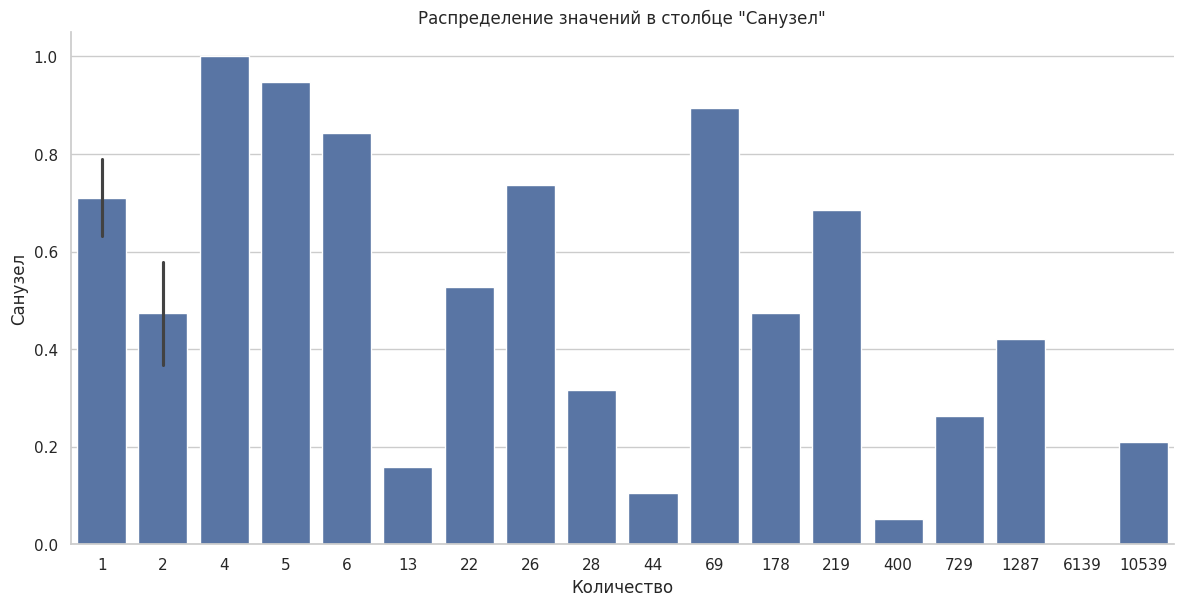

In [293]:
wc_counts = df['bathroom_encoded'].value_counts()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Устанавливаем стиль графика
sns.catplot(x="count", y="bathroom_encoded", data=wc_counts.reset_index(), kind="bar", height=6, aspect=2)

plt.title('Распределение значений в столбце "Санузел"')
plt.xlabel('Количество')
plt.ylabel('Санузел')
plt.xticks(rotation=0)

# plt.show()

In [294]:
df['balcony'].value_counts()

balcony
Балкон (0), Лоджия (0)    6623
Балкон (1)                6329
Лоджия (1)                5029
Балкон (1), Лоджия (1)     608
Лоджия (2)                 537
Балкон (2)                 423
Балкон (3)                  44
Лоджия (3)                  39
Балкон (2), Лоджия (2)      21
Балкон (1), Лоджия (2)      21
Балкон (2), Лоджия (1)      16
Лоджия (4)                   5
Балкон (4)                   4
Балкон (3), Лоджия (1)       4
Балкон (1), Лоджия (3)       4
Балкон (2), Лоджия (3)       3
Балкон (1), Лоджия (4)       2
Балкон (3), Лоджия (3)       1
Балкон (4), Лоджия (4)       1
Name: count, dtype: int64

In [295]:
def simplify_balcony(text):
    balcony_count = re.findall(r'\d+', text)
    if balcony_count:
        count = int(balcony_count[0])
        if count == 0:
            return '0'
        elif count == 1:
            return '1'
        else:
            return 'более 1'
    
df['simplify_balcony'] = df['balcony'].apply(simplify_balcony)
df['simplify_balcony'].value_counts()
df.drop('balcony', axis=1, inplace=True)

Text(12.444444444444452, 0.5, 'simplify_balcony')

<Figure size 1200x600 with 0 Axes>

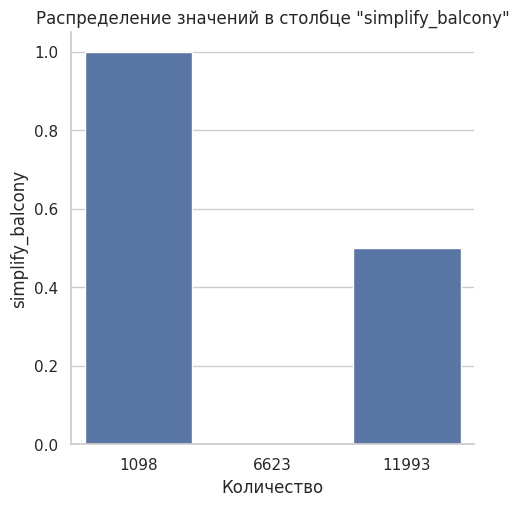

In [296]:
df['simplify_balcony'] = df['simplify_balcony'].replace({'1': '0.5', '0': '0', 'более 1': '1'}).astype(float)
balcony_counts = df['simplify_balcony'].value_counts()

plt.figure(figsize=(12, 6))
sns.catplot(x="count", y="simplify_balcony", data=balcony_counts.reset_index(), kind="bar")

plt.title('Распределение значений в столбце "simplify_balcony"')
plt.xlabel('Количество')
plt.ylabel('simplify_balcony')

In [297]:
df['window'].value_counts()

window
Во двор            14846
На улицу и двор     2753
На улицу            2115
Name: count, dtype: int64

In [298]:
df['allow_pets_children'].value_counts()

allow_pets_children
Можно с детьми                       8533
Можно с детьми, Можно с животными    6063
Нельзя с детьми/животными            4911
Можно с животными                     207
Name: count, dtype: int64

In [299]:
df['monthly_payment'].iloc[5]

470000.0

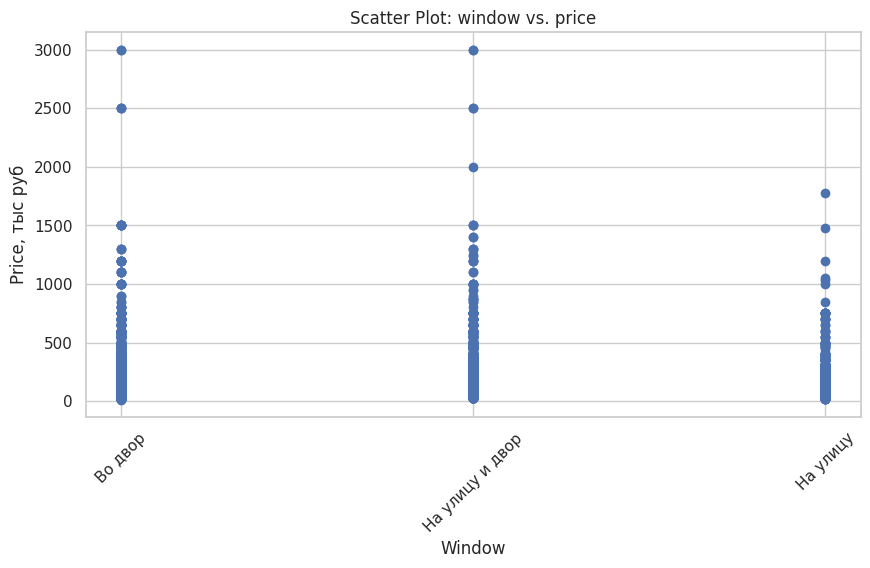

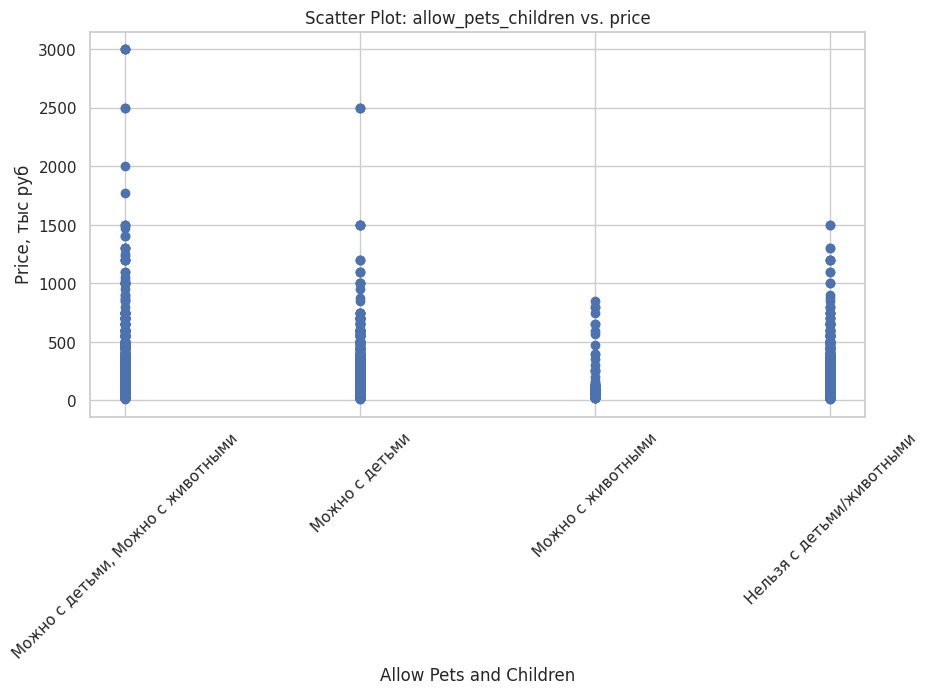

In [300]:
# Отобразим 2 графика зависимости между столбцами window и allow_pets_children и price
#  чтобы определить какую оценку присвоить значеням этих столбцов.

# Создаем scatter plot для столбца 'window'
plt.figure(figsize=(10, 5))
plt.scatter(df['window'], df['monthly_payment']/1000)
plt.xlabel('Window')
plt.ylabel('Price, тыс руб')
plt.title('Scatter Plot: window vs. price')
plt.xticks(rotation=45)
plt.show()


# Создаем scatter plot для столбца 'allow_pets_children'
plt.figure(figsize=(10, 5))
plt.scatter(df['allow_pets_children'], df['monthly_payment']/1000)
plt.xlabel('Allow Pets and Children')
plt.ylabel('Price, тыс руб')
plt.title('Scatter Plot: allow_pets_children vs. price')
plt.xticks(rotation=45)
plt.show()


In [301]:
# удаляем столбец "window", поскольку не наблюдается корреляция этого признака с ценой аренды
df.drop('window', axis=1, inplace=True)

# По столбцу allow_pets_children не обнаружено явной корреляции с ценой арендой, признак оставим,
# присвоим ему значение от 0 до 1 методом Label Encoding
df['allow_pets_children_encoded'] = df['allow_pets_children'].astype('category').cat.codes

# Создаем объект MinMaxScaler для нормализации
scaler = MinMaxScaler()

# Применяем нормализацию к столбцу 'bathroom_encoded'
df['allow_pets_children_encoded'] = scaler.fit_transform(df['allow_pets_children_encoded'].values.reshape(-1, 1))

# Теперь 'allow_pets_children_encoded' содержит значения в диапазоне от 0 до 1


df['allow_pets_children_encoded'].value_counts()
df.drop('allow_pets_children', axis=1, inplace=True)
# удаляем не актуальный столбец 'allow_pets_children'

In [302]:
df['flat_floor'] = df['building'].str.extract(r'(\d+)/').astype(int) # помимо этажности также вводим столбец с указанием номера этажа квартиры
df['floor_index'] = df['flat_floor']/df['floor']

In [303]:
df[df.duplicated(subset=['adress', 'floor', 'flat_floor', 'size', 'monthly_payment'], keep=False)]
df.drop_duplicates(subset=['adress', 'floor', 'flat_floor', 'size', 'monthly_payment'], keep='first', inplace=True) #оставили только первый дубликат
df[df.duplicated(subset=['adress', 'floor', 'flat_floor', 'size'], keep=False)] #проверили, дубликатов меньше 10. Удаляем вручную
ids_to_remove = [274260413,274551312,269047202,271271157]
df = df[~df['ID'].isin(ids_to_remove)]

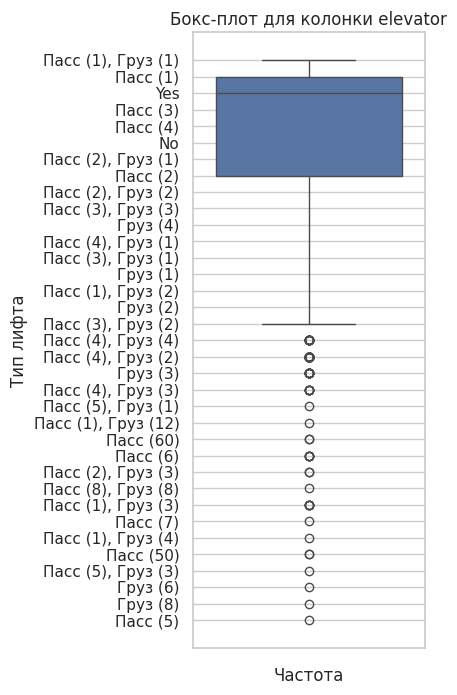

In [304]:
plt.figure(figsize=(3, 8))
sns.boxplot(y='elevator', data=df)
plt.ylabel('Тип лифта')
plt.xlabel('Частота')
plt.title('Бокс-плот для колонки elevator')
plt.show()

In [305]:
df['elevator'] = df['elevator'].replace('Yes', 'Пасс (1)') #подставляю модальное значение из изначального датафрейма вместо "yes"

In [306]:
# Создаем новый столбец с значениями с Label Encoding
df['elevator_encoded'] = df['elevator'].astype('category').cat.codes
# Создаем объект MinMaxScaler для нормализации
scaler = MinMaxScaler()
# Применяем нормализацию к столбцу ''elevator_encoded'
df['elevator_encoded'] = scaler.fit_transform(df['elevator_encoded'].values.reshape(-1, 1))
# Теперь 'elevator_encoded' содержит значения в диапазоне от 0 до 1
df['elevator_encoded'].value_counts()
df.drop('elevator', axis=1, inplace=True) # удаляем неактуальный столбец 'elevator'

In [307]:
df['residential_complex'].value_counts() # здесь изначально было всё приведено к нужному типу данных

residential_complex
0    14569
1     4116
Name: count, dtype: int64

In [308]:
# Создаем новый столбец с значениями с Label Encoding
df['refurbishment_encoded'] = df['refurbishment'].astype('category').cat.codes
# Создаем объект MinMaxScaler для нормализации
scaler = MinMaxScaler()
# Применяем нормализацию к столбцу 'refurbishment_encoded'
df['refurbishment_encoded'] = scaler.fit_transform(df['refurbishment_encoded'].values.reshape(-1, 1))
# Теперь ''refurbishment_encoded' содержит значения в диапазоне от 0 до 1
df['refurbishment_encoded'].value_counts()
df.drop('refurbishment', axis=1, inplace=True)
# удаляем неактуальный столбец 'refurbishment'

In [309]:
df['refurbishment_encoded'].value_counts()

refurbishment_encoded
0.75    7122
0.50    6560
0.25    2486
1.00    2386
0.00     131
Name: count, dtype: int64

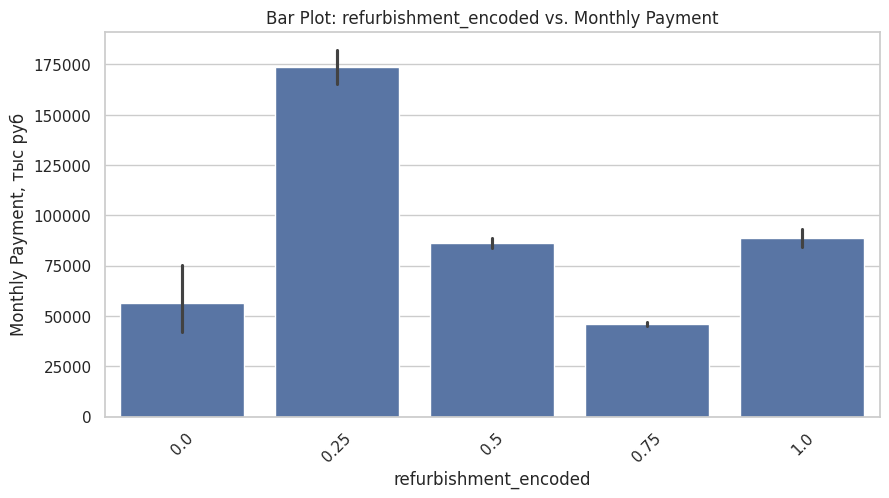

In [310]:
# Отобразим график зависимости между refurbishment_encoded и monthly_payment
plt.figure(figsize=(10, 5))
sns.barplot(x='refurbishment_encoded', y='monthly_payment', data=df)
plt.xlabel('refurbishment_encoded')
plt.ylabel('Monthly Payment, тыс руб')
plt.title('Bar Plot: refurbishment_encoded vs. Monthly Payment')
plt.xticks(rotation=45)
plt.show()

In [311]:
replace_dict = {"yes": 1, "Да": 1, "Нет": 0}
# Применяем замену к столбцу 'garbage_chute'
df['garbage_chute'] = df['garbage_chute'].replace(replace_dict)
df['garbage_chute'] = df['garbage_chute'].astype(int)
df['garbage_chute'].value_counts()

garbage_chute
1    17337
0     1348
Name: count, dtype: int64

In [312]:
replace_dict = {"наземная": 1, "подземная": 1, "многоуровневая": 1, "на крыше":1, "открытая":1, "уличная": 0}
# Применяем замену к столбцу 'garbage_chute'
df['parking'] = df['parking'].replace(replace_dict)
df['parking'] = df['parking'].astype(int)
df['parking'].value_counts()

parking
0    10665
1     8020
Name: count, dtype: int64

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18685 entries, 1 to 23367
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18685 non-null  int64  
 1   number_of_rooms              18685 non-null  int64  
 2   metro                        18685 non-null  object 
 3   adress                       18685 non-null  object 
 4   size                         18685 non-null  float64
 5   building                     18685 non-null  object 
 6   parking                      18685 non-null  int64  
 7   residential_complex          18685 non-null  int64  
 8   ceiling_height               18685 non-null  float64
 9   garbage_chute                18685 non-null  int64  
 10  monthly_payment              18685 non-null  float64
 11  floor                        18685 non-null  int64  
 12  amenities                    18685 non-null  float64
 13  distance             

Собираем в финальный файл

In [314]:
df.drop(['metro', 'adress'] ,axis=1,inplace=True)

In [315]:
df.to_csv('final_data.csv')